In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#reading the cash_request file
cash_request = pd.read_csv("/content/extract - cash request - data analyst.csv")
fees = pd.read_csv("/content/extract - fees - data analyst - .csv")
cash_request.info()
fees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

In [ ]:
merged_df = pd.merge(left = cash_request, right= fees, left_on= "id", right_on="cash_request_id", how = "left")
merged_df.sort_values(by="id_x")
#merged_df.info()

#check duplicates
duplicates = merged_df[merged_df.duplicated(subset=["id_x"], keep=False)]
duplicates.head()
#duplicated ids for cash requests due to different incidents


,id_x,amount,status_x,created_at_x,updated_at_x,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,status_y,category,total_amount,reason,created_at_y,updated_at_y,paid_at,from_date,to_date,charge_moment
141,6098,100.0,active,2020-07-01 09:30:03.14541+00,2020-08-11 22:27:58.240406+00,23328.0,2020-07-01 16:44:53.070844+00,NaN,2020-08-03 22:00:00+00,2020-07-03,...,cancelled,NaN,5.0,Postpone Cash Request 6098,2020-08-13 10:58:39.63422+00,2020-10-13 14:25:16.660127+00,NaN,2020-08-03 22:00:00+00,2020-09-03 10:58:32.274+00,after
142,6098,100.0,active,2020-07-01 09:30:03.14541+00,2020-08-11 22:27:58.240406+00,23328.0,2020-07-01 16:44:53.070844+00,NaN,2020-08-03 22:00:00+00,2020-07-03,...,cancelled,NaN,5.0,Postpone Cash Request 6098,2020-08-13 10:58:52.603153+00,2020-10-13 14:25:16.661371+00,NaN,2020-08-03 22:00:00+00,2020-09-03 10:58:32.274+00,after
143,6098,100.0,active,2020-07-01 09:30:03.14541+00,2020-08-11 22:27:58.240406+00,23328.0,2020-07-01 16:44:53.070844+00,NaN,2020-08-03 22:00:00+00,2020-07-03,...,cancelled,NaN,5.0,Postpone Cash Request 6098,2020-08-13 11:00:39.879521+00,2020-10-13 14:25:16.662449+00,NaN,2020-08-03 22:00:00+00,2020-09-01 11:00:34.027+00,after
144,6098,100.0,active,2020-07-01 09:30:03.14541+00,2020-08-11 22:27:58.240406+00,23328.0,2020-07-01 16:44:53.070844+00,NaN,2020-08-03 22:00:00+00,2020-07-03,...,cancelled,NaN,5.0,Postpone Cash Request 6098,2020-08-19 16:30:48.607923+00,2020-10-13 14:25:16.91377+00,NaN,2020-08-03 22:00:00+00,2020-09-03 16:30:45.837+00,after
145,6098,100.0,active,2020-07-01 09:30:03.14541+00,2020-08-11 22:27:58.240406+00,23328.0,2020-07-01 16:44:53.070844+00,NaN,2020-08-03 22:00:00+00,2020-07-03,...,cancelled,month_delay_on_payment,5.0,month delay on payment - 9/2020,2020-09-10 22:32:51.726321+00,2020-12-15 17:07:43.211171+00,NaN,NaN,NaN,after


In [ ]:
#merged_df.to_csv("merged_data_ironhack_payment")
#renaming columns
#merged_df = merged_df.rename(columns={"amount" : "amount_CR", "status_x" : "status_CR", "status_y" : "status_fees", "total_amount" : "amount_fees", "created_at_x" : "created_at_CR", "id_x" : "id_CR"})
#print(merged_df.shape)
#merged_df.head()

In [ ]:
#merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32094 entries, 0 to 32093
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_CR                       32094 non-null  int64  
 1   amount_CR                   32094 non-null  float64
 2   status_CR                   32094 non-null  object 
 3   created_at_CR               32094 non-null  object 
 4   updated_at_x                32094 non-null  object 
 5   user_id                     29522 non-null  float64
 6   moderated_at                21759 non-null  object 
 7   deleted_account_id          2573 non-null   float64
 8   reimbursement_date          32094 non-null  object 
 9   cash_request_received_date  24149 non-null  object 
 10  money_back_date             23917 non-null  object 
 11  transfer_type               32094 non-null  object 
 12  send_at                     22678 non-null  object 
 13  recovery_status             720

# Frequency of Service Usage: Understand how often users from each cohort utilize IronHack Payments' cash advance services over time.

In [20]:
#convert creat at column to datetime
cash_request["created_at"] = pd.to_datetime(cash_request["created_at"])

# group by user and take the first created date as cohort month
cash_request["cohort_month"] = cash_request.groupby("user_id")["created_at"].transform("min")
cash_request["cohort_month"] = cash_request["cohort_month"].dt.to_period("M") #transforming to period


# take created_date as usage_date
cash_request["usage_month"] = cash_request["created_at"].dt.to_period("M")
cash_request.head()

<ipython-input-20-f0b928f0a42b>:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash_request["cohort_month"] = cash_request["cohort_month"].dt.to_period("M") #transforming to period
<ipython-input-20-f0b928f0a42b>:10: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash_request["usage_month"] = cash_request["created_at"].dt.to_period("M")


,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,cohort_month,usage_month
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12,2019-12
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12,2019-12
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12,2019-12
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12,2019-12
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2020-05,2020-05


In [15]:
#how often users from each cohort use cash advance services?
usage_frequency = cash_request.groupby(["cohort_month", "usage_month"]) ["id"].count().reset_index()
usage_frequency = usage_frequency.rename(columns={"id" : "usage_freq"})
usage_frequency["cohort_month"] = usage_frequency["cohort_month"].astype(str) #converting date to str
usage_frequency["usage_month"] = usage_frequency["usage_month"].astype(str) #converting date to str
usage_frequency_pivot = usage_frequency.pivot(index="cohort_month", columns="usage_month", values="usage_freq")
usage_frequency_pivot

usage_month,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
cohort_month,,,,,,,,,,,,
2019-11,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12,5.0,7.0,5.0,11.0,16.0,54.0,80.0,16.0,5.0,1.0,4.0,NaN
2020-01,NaN,NaN,3.0,1.0,3.0,10.0,32.0,35.0,6.0,NaN,NaN,NaN
2020-02,NaN,1.0,NaN,2.0,1.0,8.0,16.0,45.0,7.0,3.0,1.0,NaN
2020-03,2.0,NaN,1.0,NaN,1.0,4.0,4.0,24.0,26.0,5.0,2.0,NaN
2020-04,8.0,5.0,1.0,5.0,13.0,6.0,16.0,17.0,46.0,68.0,27.0,NaN
2020-05,13.0,7.0,9.0,8.0,14.0,11.0,73.0,63.0,28.0,61.0,81.0,1.0
2020-06,2.0,3.0,1.0,3.0,5.0,8.0,95.0,151.0,200.0,250.0,551.0,11.0
2020-07,2.0,2.0,1.0,2.0,3.0,3.0,34.0,38.0,70.0,87.0,182.0,4.0


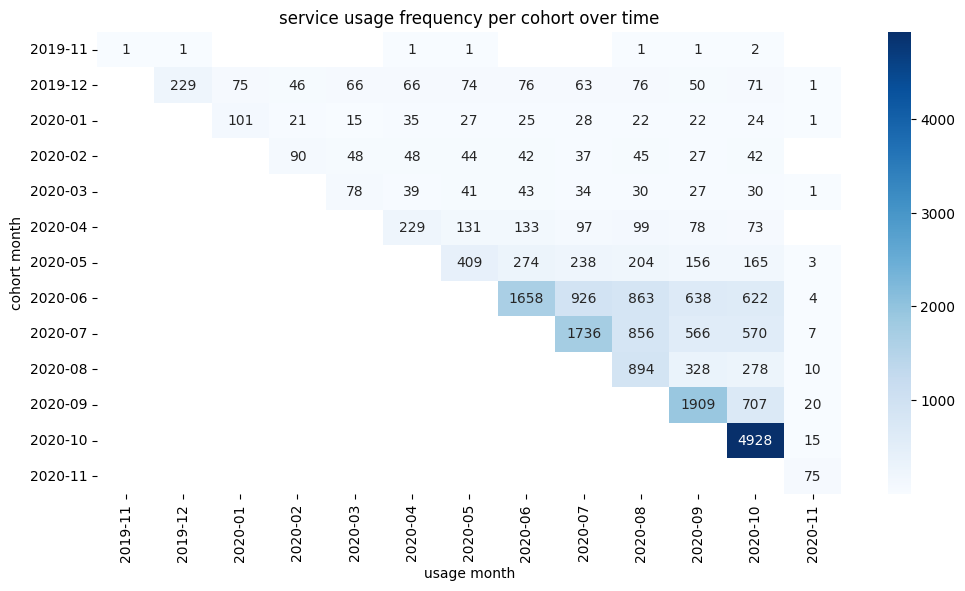

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(usage_frequency_pivot,  annot=True, fmt='g', cmap='Blues')
plt.title("service usage frequency per cohort over time")
plt.ylabel("cohort month")
plt.xlabel("usage month")
plt.show()
#interpretation
#small user size in early cohorts --> possilby launch phase
#big increase in users from June 2020 on
#drop in use after first month --> retention curve?
#some cohorts more active in later month e.g. june 2020 vs july 2020

In [21]:
#cash_request.isnull().mean() #% of missing per column
# the last 3 columns are likewise poorly filled


In [22]:
#fees.isnull().mean()

In [ ]:
fees.head()
fees["total_amount"].value_counts()

,count
total_amount,
5.0,21060
10.0,1


# Incident Rate: Determine the incident rate, specifically focusing on payment incidents, for each cohort. Identify if there are variations in incident rates among different cohorts.

In [ ]:
#check type values
fees["type"].value_counts()

,count
type,
instant_payment,11099
postpone,7766
incident,2196


In [7]:
#define incidents
incidents = ["incident"]

#new boolean column for incident
fees["is_incident"] = fees["type"].isin(incidents)
fees

#calculate incidents per cash request
incidents_per_CR = fees.groupby(["cash_request_id"]).agg(total_incidents=("is_incident", "sum")).reset_index()
incidents_per_CR.value_counts()

,,count
cash_request_id,total_incidents,
27010.0,0,1
1456.0,0,1
1503.0,0,1
1518.0,0,1
1554.0,0,1
...,...,...
1631.0,0,1
1625.0,4,1
1602.0,0,1


In [9]:
#create incident rate per cohort

incidents_per_cohort = pd.merge(cash_request,incidents_per_CR, left_on="id", right_on="cash_request_id", how="left" )
incidents_per_cohort
incident_summary = incidents_per_cohort.groupby(["cohort_month"]).agg( total_requests=("id", "count"), total_incidents=("total_incidents", "sum")). reset_index()
incident_summary
incident_summary["incident_rate"] = incident_summary["total_incidents"] / incident_summary["total_requests"]
incident_summary

,cohort_month,total_requests,total_incidents,incident_rate
0,2019-11,8,0.0,0.000000
1,2019-12,893,42.0,0.047032
2,2020-01,321,21.0,0.065421
3,2020-02,423,24.0,0.056738
4,2020-03,323,29.0,0.089783
5,2020-04,840,113.0,0.134524
6,2020-05,1449,204.0,0.140787
7,2020-06,4711,697.0,0.147952
8,2020-07,3735,542.0,0.145114
9,2020-08,1510,145.0,0.096026


Text(0, 0.5, 'incident rate')

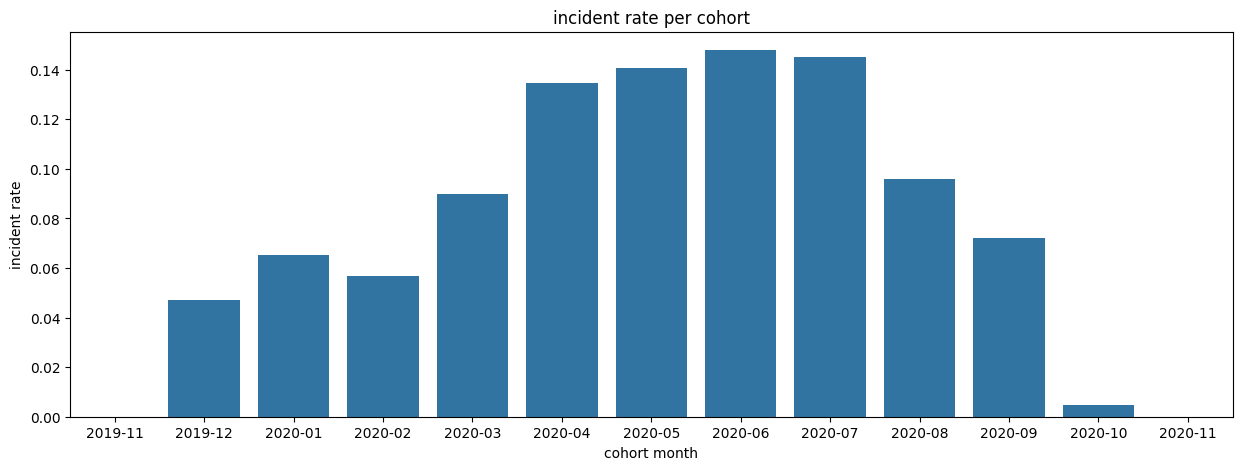

In [ ]:
plt.figure(figsize = (15, 5))
sns.barplot(data=incident_summary, x="cohort_month", y = "incident_rate")
plt.title("incident rate per cohort")
plt.xlabel("cohort month")
plt.ylabel("incident rate")

#analysis
#peaks in Jun 2020
#decrease from July on >> technological improvements? better incident management?

# Revenue Generated by the Cohort: Calculate the total revenue generated by each cohort over months to assess the financial impact of user behavior.

In [11]:
cash_request["created_at"] = pd.to_datetime(cash_request["created_at"])
#summing total amount by cash request in file fees because CR Ids are doubled
fees_by_cash_request = fees.groupby(["cash_request_id"]).agg({"total_amount" : "sum"}).reset_index()
fees_by_cash_request
#merging CR with summed fees by CR id
merged_df_2 = pd.merge(cash_request, fees_by_cash_request, left_on="id", right_on="cash_request_id", how="left")
merged_df_2

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,cohort_month,usage_month,cash_request_id,total_amount
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12,2019-12,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12,2019-12,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12,2019-12,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12,2019-12,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2020-05,2020-05,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23965,20616,100.0,money_back,2020-10-12 13:54:11.686225+00:00,2021-02-06 20:17:49.292493+00,13681.0,NaN,NaN,2021-02-06 11:00:00+00,2020-10-13,2021-02-06 20:17:49.257521+00,instant,2020-10-12 13:54:24.352856+00,NaN,NaN,NaN,2020-06,2020-10,20616.0,5.0
23966,25243,50.0,money_back,2020-10-27 14:41:25.734910+00:00,2020-12-18 13:15:40.843946+00,NaN,NaN,30367.0,2020-11-03 22:00:00+00,2020-10-28,2020-12-01 13:26:53.787672+00,instant,2020-10-27 14:41:57.901946+00,completed,2020-11-12 23:20:41.928788+00,2020-12-01 13:26:53.815504+00,NaT,2020-10,25243.0,10.0
23967,22357,100.0,money_back,2020-10-20 07:58:04.006937+00:00,2021-02-05 12:19:30.656816+00,82122.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-21,2021-02-05 12:19:30.626289+00,instant,2020-10-20 07:58:14.171553+00,NaN,NaN,NaN,2020-10,2020-10,22357.0,10.0
23968,20256,100.0,money_back,2020-10-10 05:40:55.700422+00:00,2021-02-05 13:14:19.707627+00,64517.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-12,2021-02-05 13:14:19.689906+00,instant,2020-10-10 05:41:23.368363+00,NaN,NaN,NaN,2020-10,2020-10,20256.0,10.0


In [ ]:
cohort_revenue = merged_df_2.groupby(["cohort_month", "usage_month"]).agg({"total_amount" : "sum"}).reset_index()
cohort_revenue

,cohort_month,usage_month,total_amount
0,2019-11,2019-11,0.0
1,2019-11,2019-12,0.0
2,2019-11,2020-04,0.0
3,2019-11,2020-05,25.0
4,2019-11,2020-08,10.0
...,...,...,...
78,2020-09,2020-10,4160.0
79,2020-09,2020-11,75.0
80,2020-10,2020-10,28935.0
81,2020-10,2020-11,55.0


In [ ]:
cohort_revenue["cohort_month"] = cohort_revenue["cohort_month"].astype(str) #converting date to str so that we can use the column as index and column name later
cohort_revenue["usage_month"] = cohort_revenue["usage_month"].astype(str) #converting date to str
revenue_pivot = cohort_revenue.pivot(index = "cohort_month", columns="usage_month", values= "total_amount")
revenue_pivot

usage_month,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
cohort_month,,,,,,,,,,,,,
2019-11,0.0,0.0,NaN,NaN,NaN,0.0,25.0,NaN,NaN,10.0,5.0,10.0,NaN
2019-12,NaN,0.0,0.0,0.0,0.0,0.0,60.0,205.0,150.0,555.0,175.0,320.0,0.0
2020-01,NaN,NaN,0.0,0.0,0.0,0.0,40.0,60.0,180.0,145.0,125.0,135.0,0.0
2020-02,NaN,NaN,NaN,0.0,0.0,0.0,80.0,130.0,135.0,285.0,115.0,220.0,NaN
2020-03,NaN,NaN,NaN,NaN,0.0,0.0,10.0,205.0,85.0,160.0,140.0,200.0,5.0
2020-04,NaN,NaN,NaN,NaN,NaN,5.0,180.0,500.0,345.0,615.0,390.0,330.0,NaN
2020-05,NaN,NaN,NaN,NaN,NaN,NaN,810.0,885.0,825.0,1005.0,870.0,870.0,15.0
2020-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5735.0,2210.0,5470.0,3920.0,3340.0,15.0
2020-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5460.0,4725.0,3200.0,2965.0,20.0


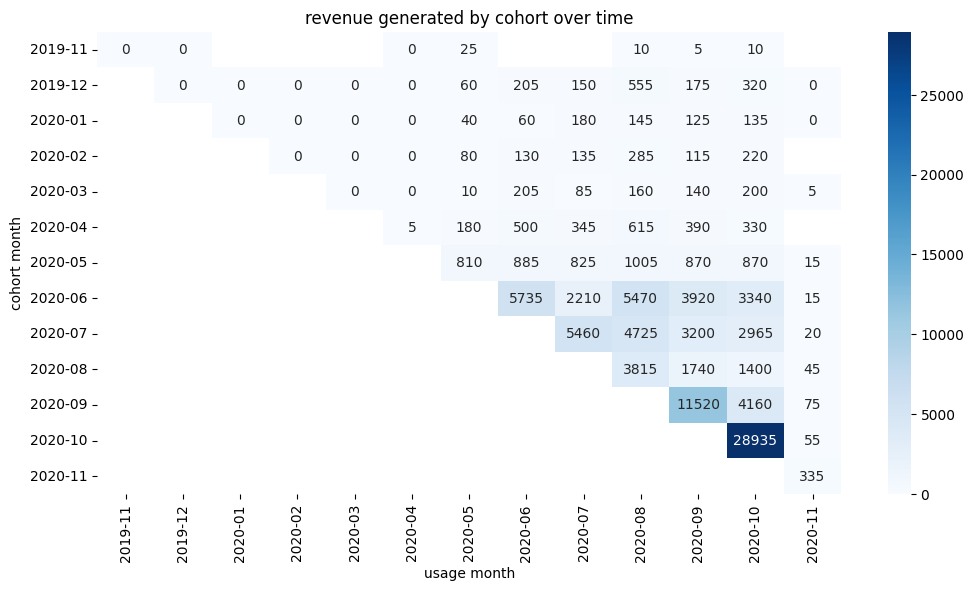

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(revenue_pivot,  annot=True, fmt='g', cmap='Blues')
plt.title("revenue generated by cohort over time")
plt.ylabel("cohort month")
plt.xlabel("usage month")
plt.show()
#analysis
#early cohorts generated no revenue, indicating initial phase / launch
#big spike in revenue in june, july >> product update? successful marketing campagne?
#later cohorts in sept, oct show spikes again >> changed user behavior? product updates, pricing updates?
#continuous revenue decrease over time >> first month has the highest reveneu followed by decreasing usage>> one-time usage? low retention?

In [ ]:
fees["reason"].value_counts() #Filled only if the CR was manually reviewed and rejected. That's the rejection's reason displayed in-app.

,count
reason,
rejected direct debit,1599
month delay on payment - 9/2020,283
month delay on payment - 8/2020,203
month delay on payment - 10/2020,102
Postpone Cash Request 12225,34
...,...
Instant Payment Cash Request 21140,1
Instant Payment Cash Request 25010,1
Postpone Cash Request 16749,1


In [ ]:
#ideas for other KPIs: revenue on risk >> revenue with an incident
#exposure at risk >> borrowed money
#time to repayment
